## Importing the necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [54]:
df=pd.read_csv('Loan_Modelling.csv')

## Data Overview

## Displaying the first and last 5 rows of the dataset

In [55]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [56]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

## Checking the data types of the columns for the dataset.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:
All the columns are numerical.

## Checking the shape of the dataset

In [58]:
df.shape[0],df.shape[1]

(5000, 14)

Observations:
There are 5000 rows and 14 columns in the dataset

## Checking for missing values

In [59]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observations:
There are no null values in the dataset

## Checking for duplicated values

In [60]:
df.duplicated().sum()

np.int64(0)

Observations: There are no duplicate values in the dataset

In [61]:
# checking the number of unique values in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

## Dropping columns

In [62]:
df.drop(columns=["ID", "ZIPCode"], inplace=True)

* Dropping the ID and ZIPCode columns because they don't give any important information

## Checking the Statistical Summary

In [63]:
df.describe().T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal_Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities_Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD_Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal_Loan         1.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0

Observations:
- Average mortgage is about $57
- Average spending on credit cards per month is nearly \$2
- On an average the family size of the customers is 2

## Exploratory Data Analysis

### Univariate analysis

**The below functions need to be defined to carry out the EDA.**

In [64]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [65]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

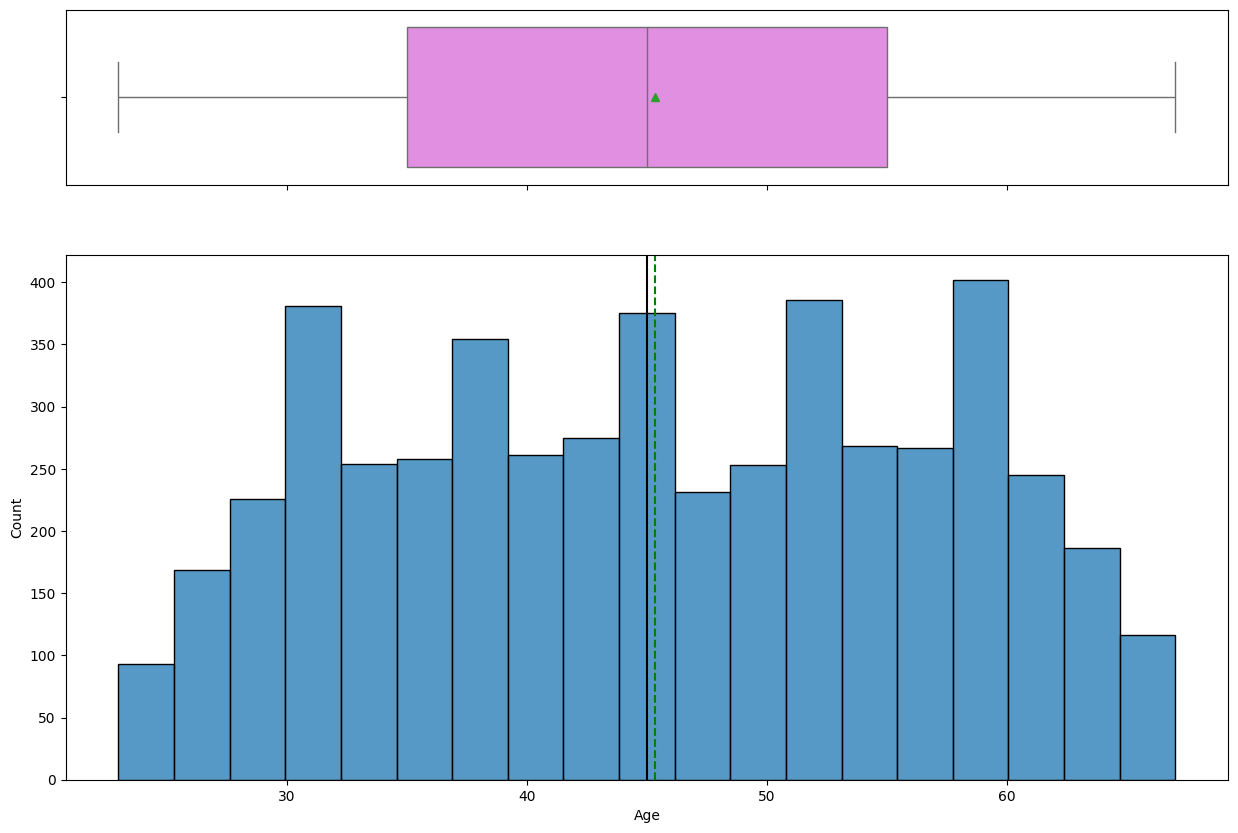

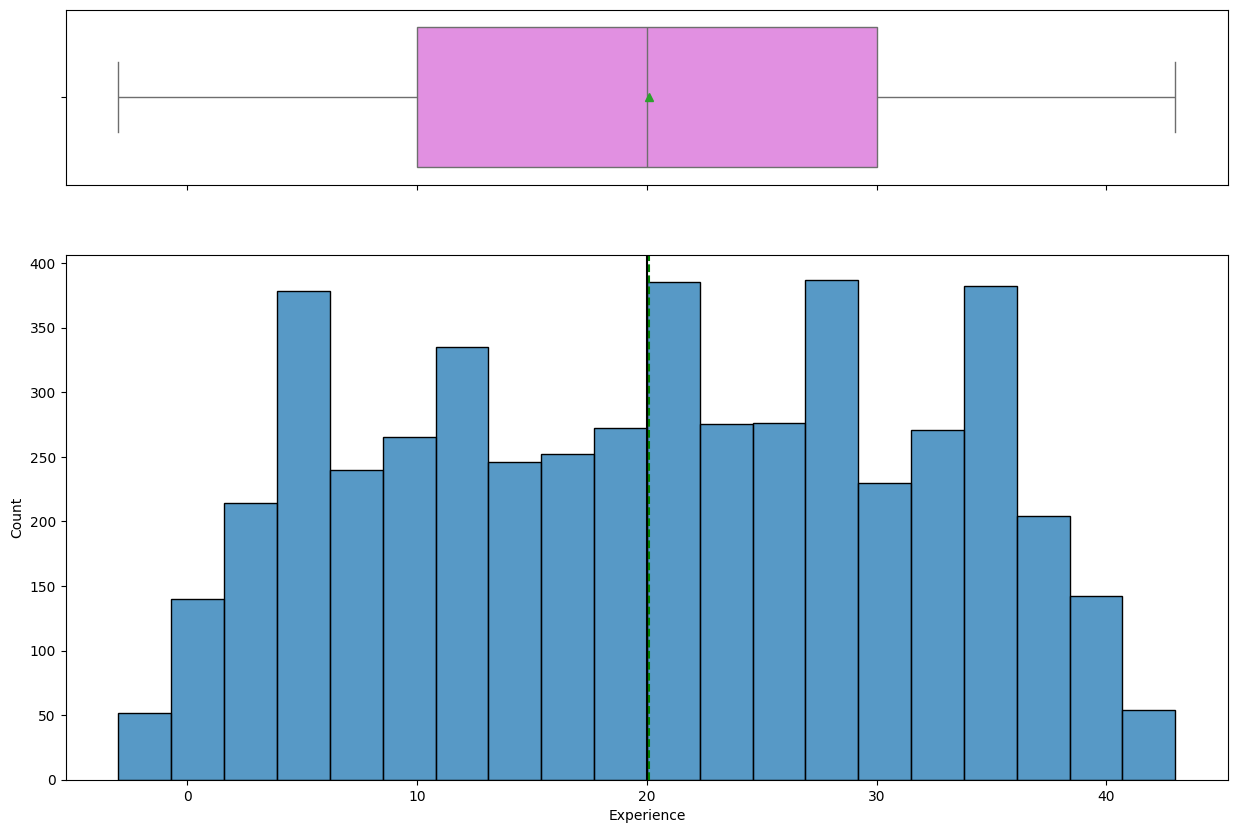

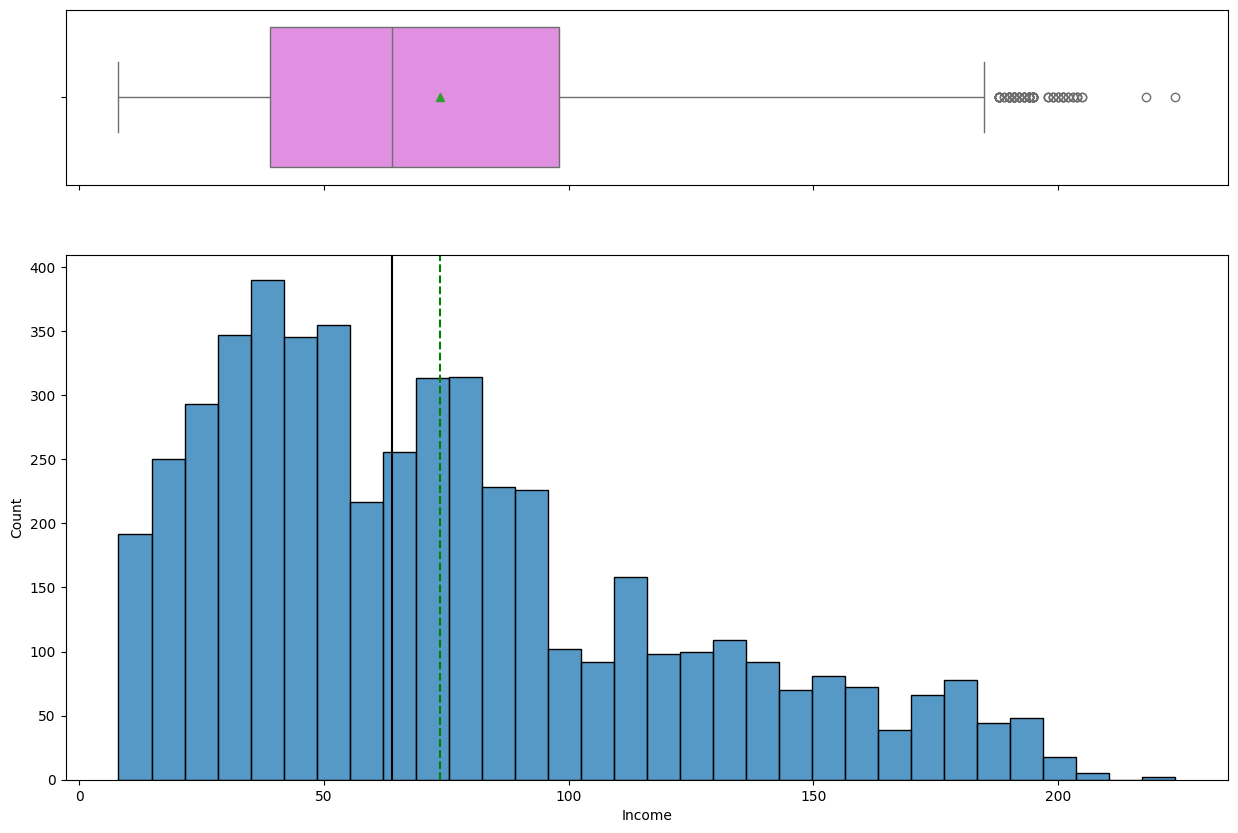

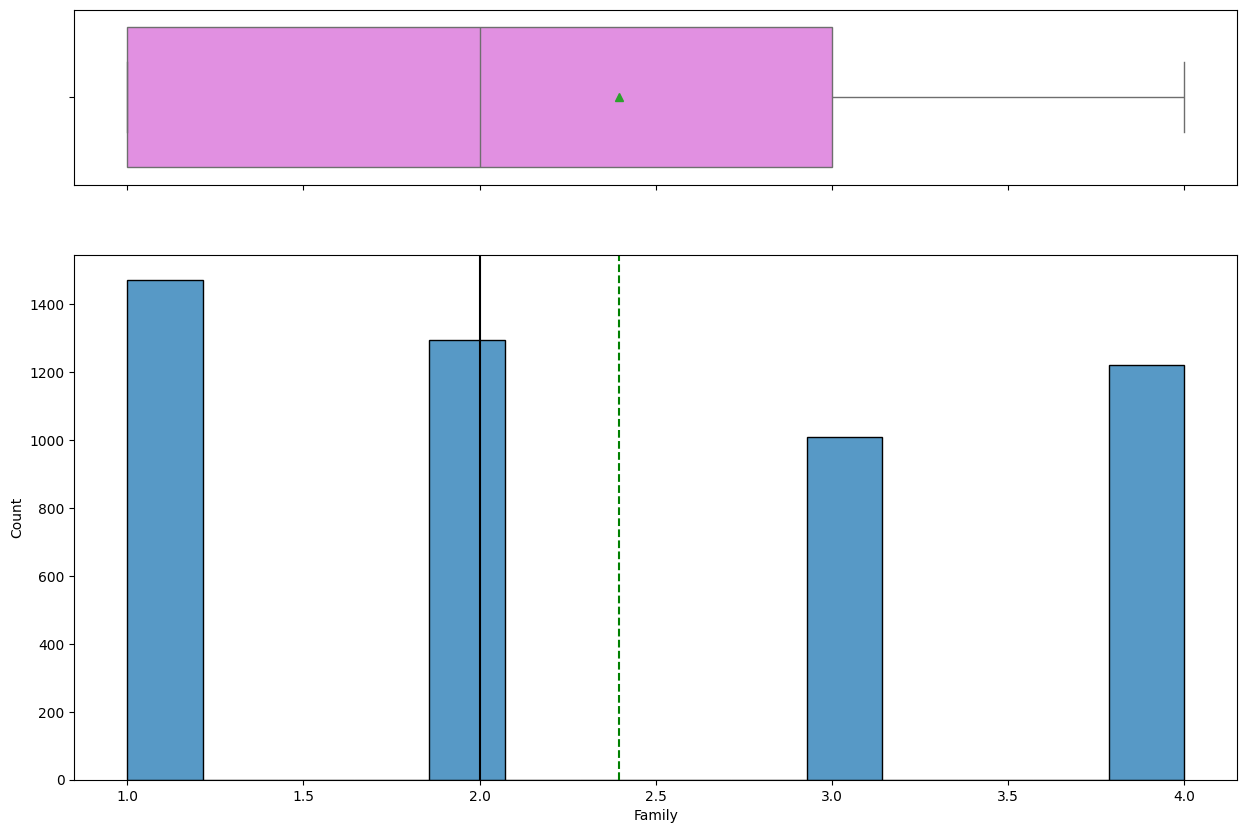

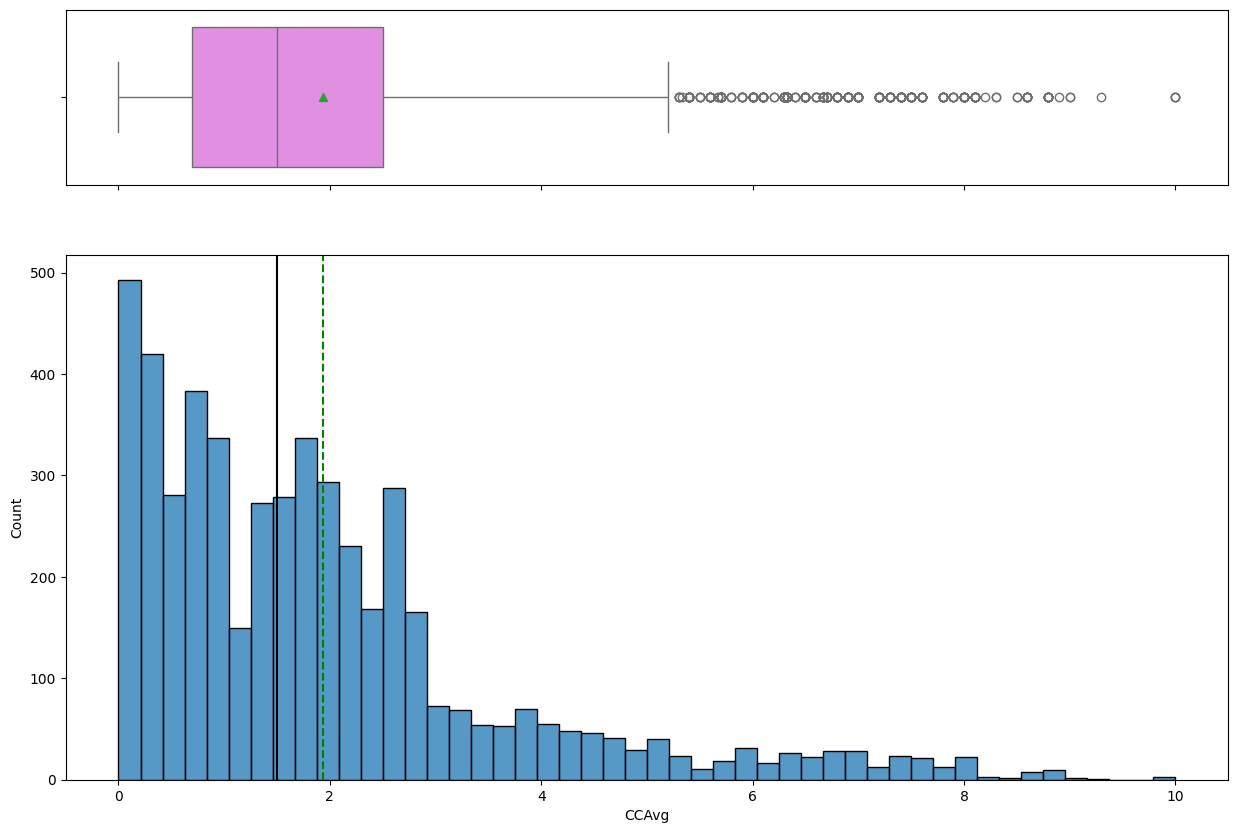

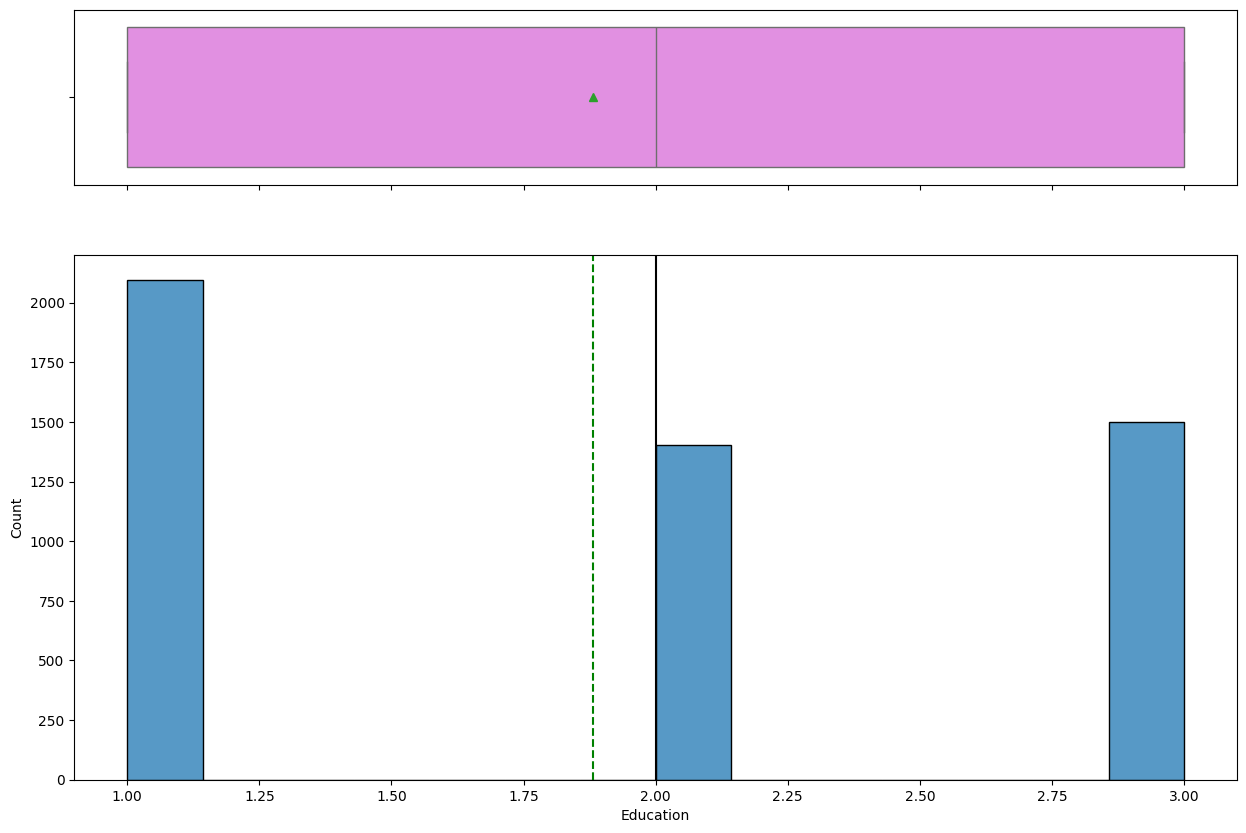

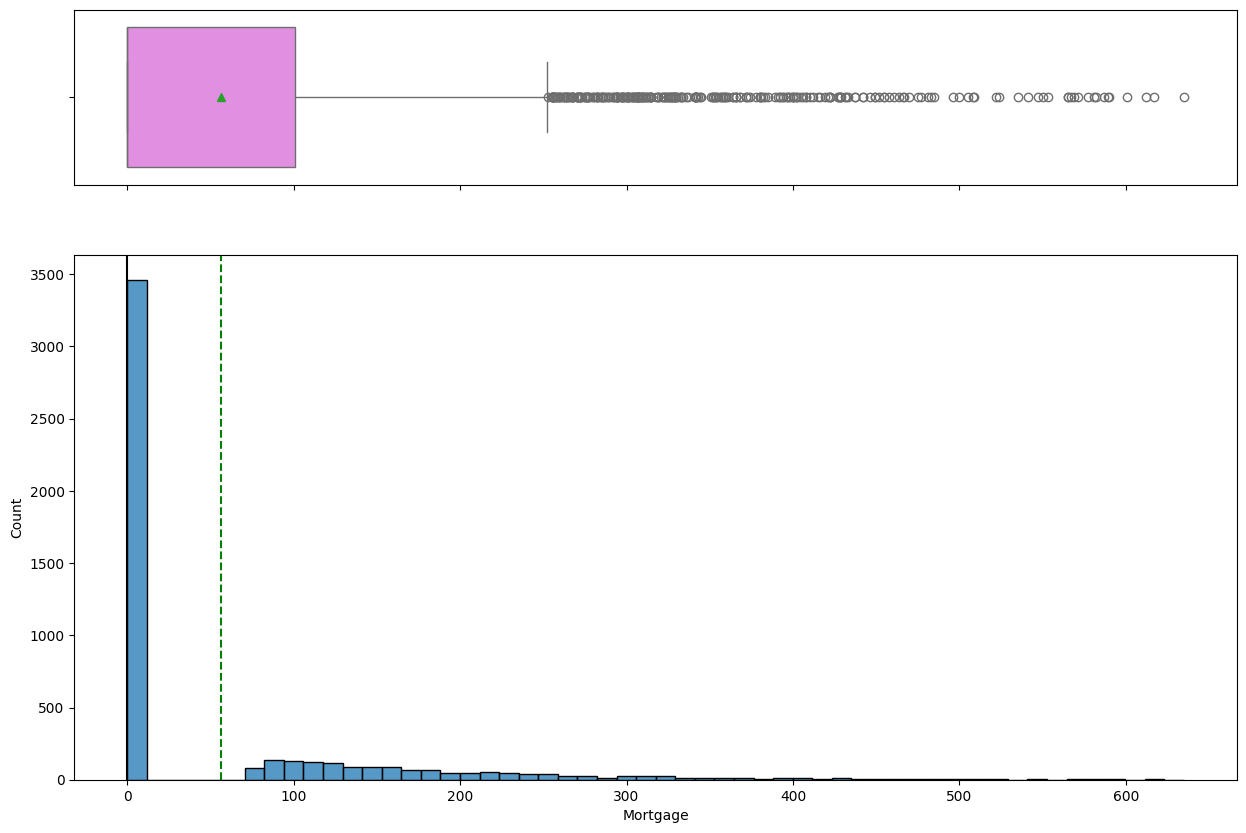

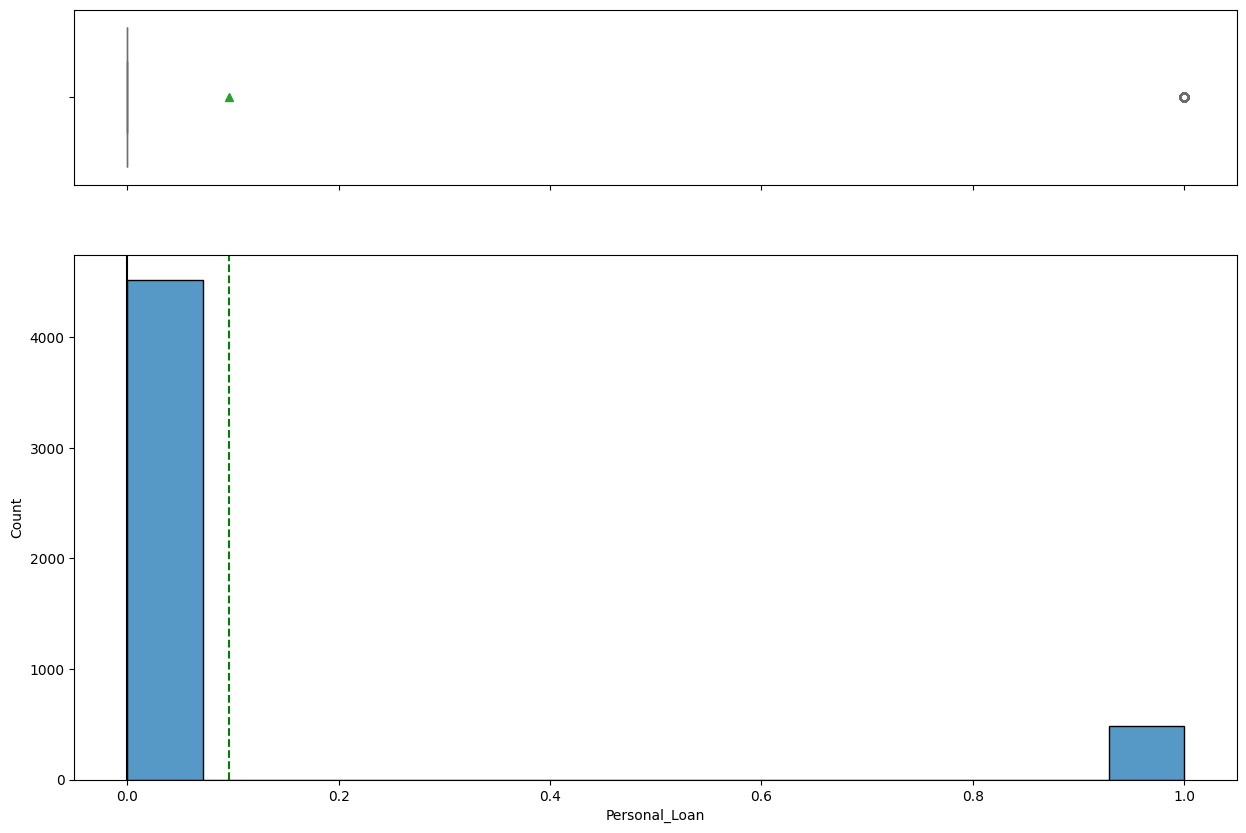

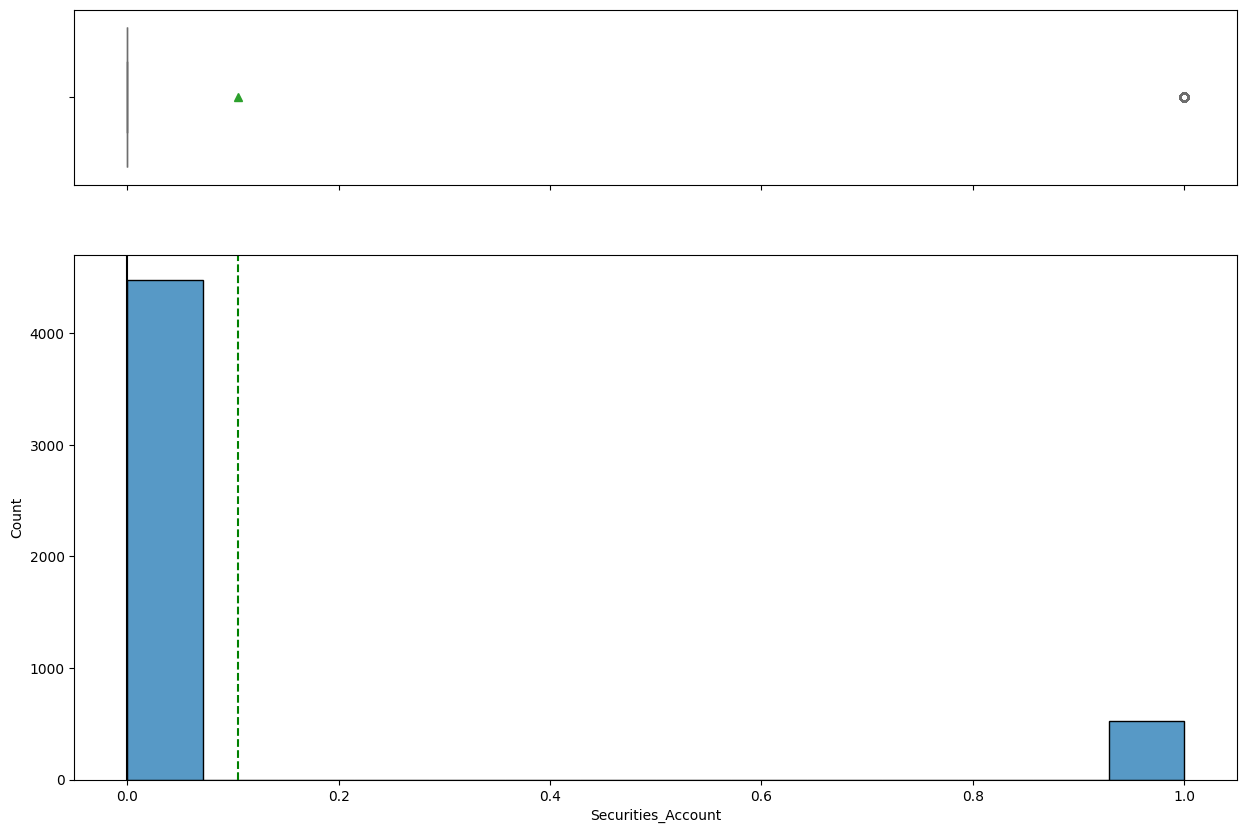

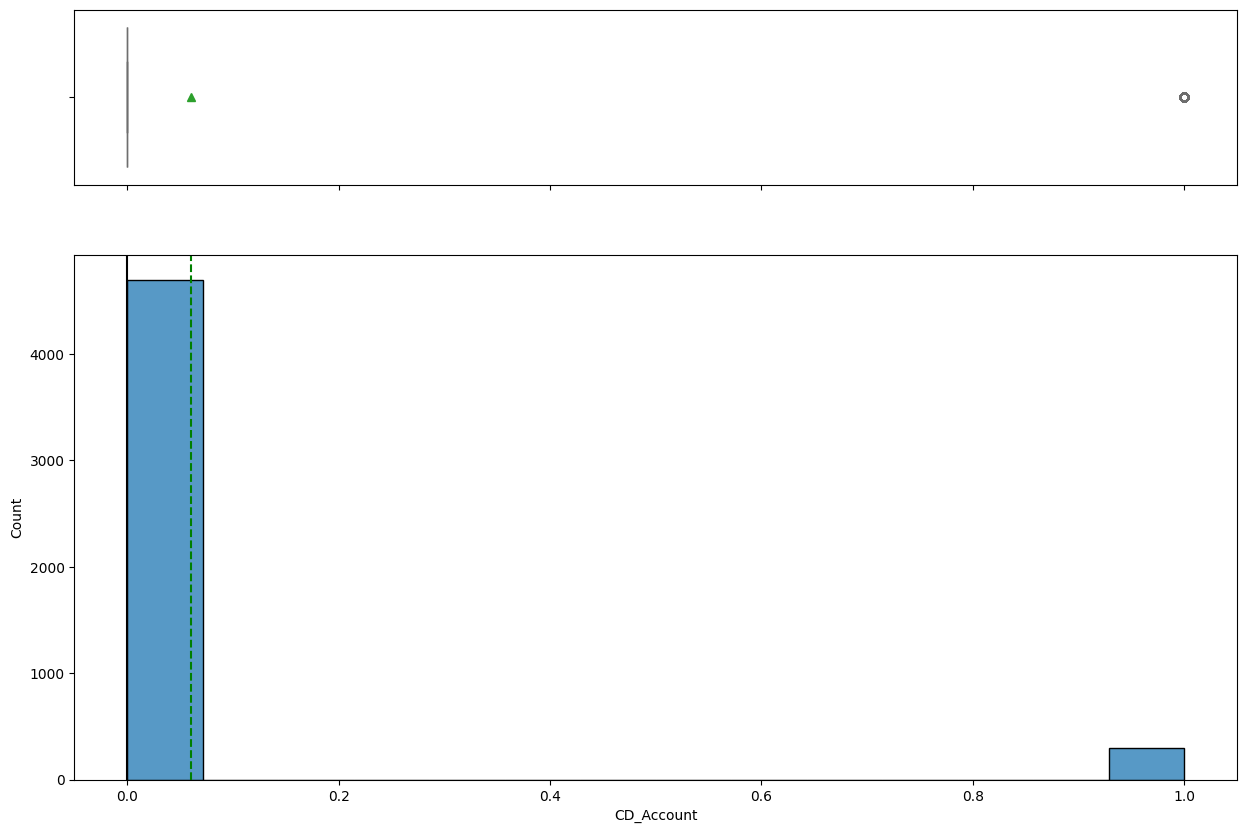

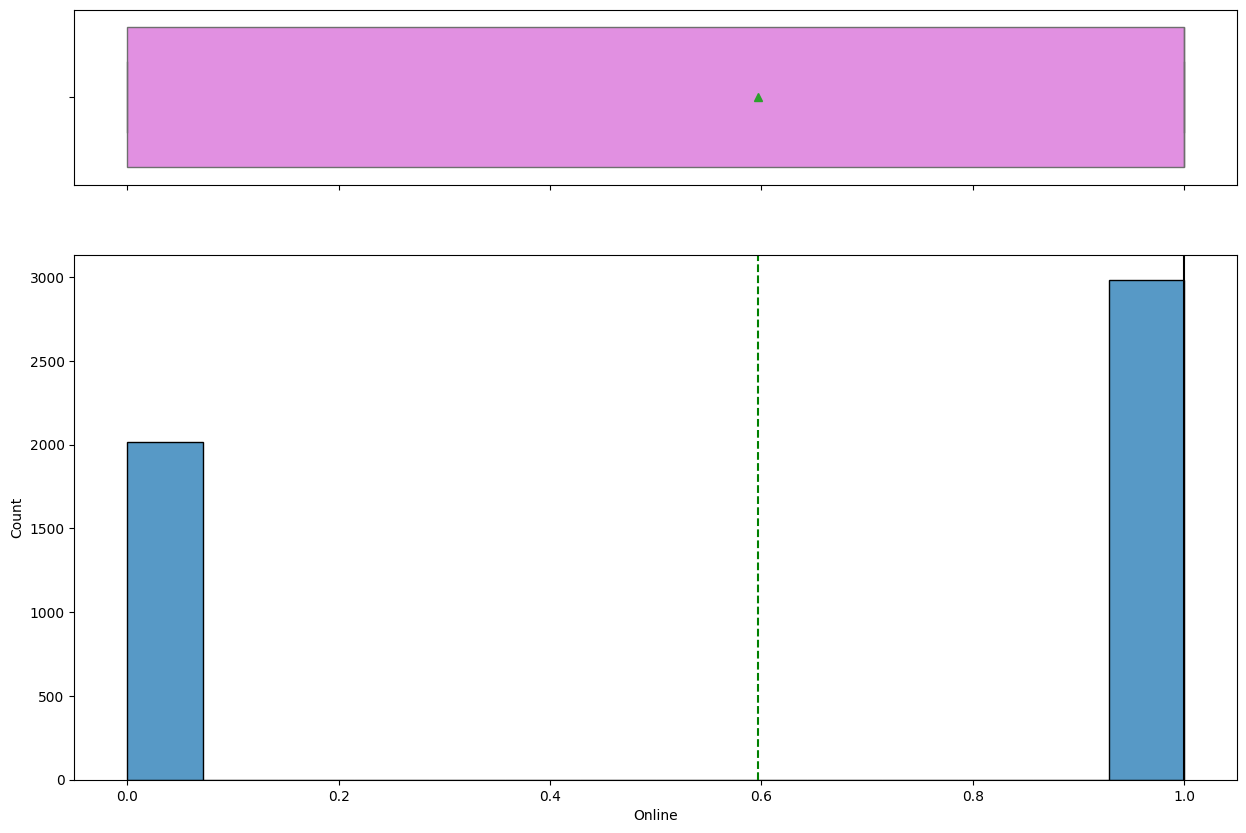

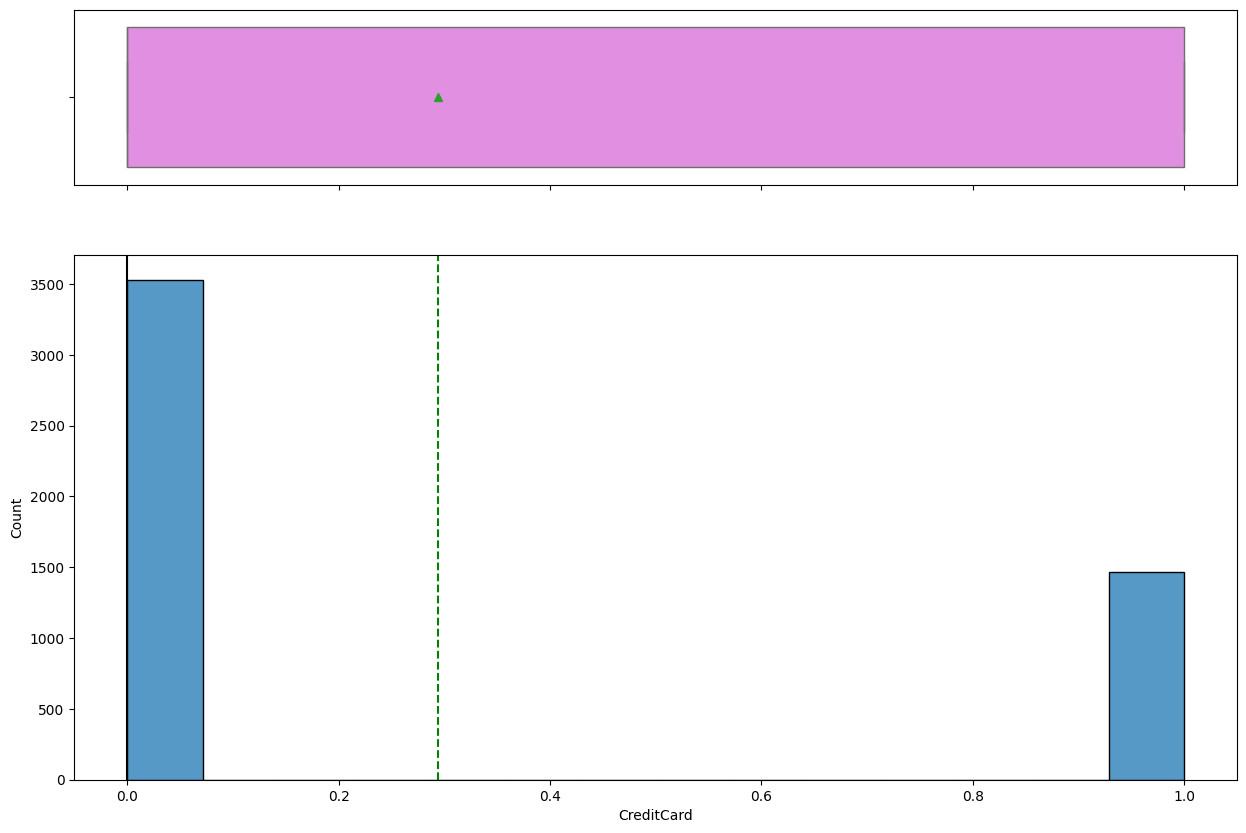

In [66]:
for col in df.columns:
    histogram_boxplot(df, col)

Observations:
- There are 3 levels of education
- Most of the customers (more than 3000) do not have credit cards with any other bank
- 3000 customers use the Internet banking facilities

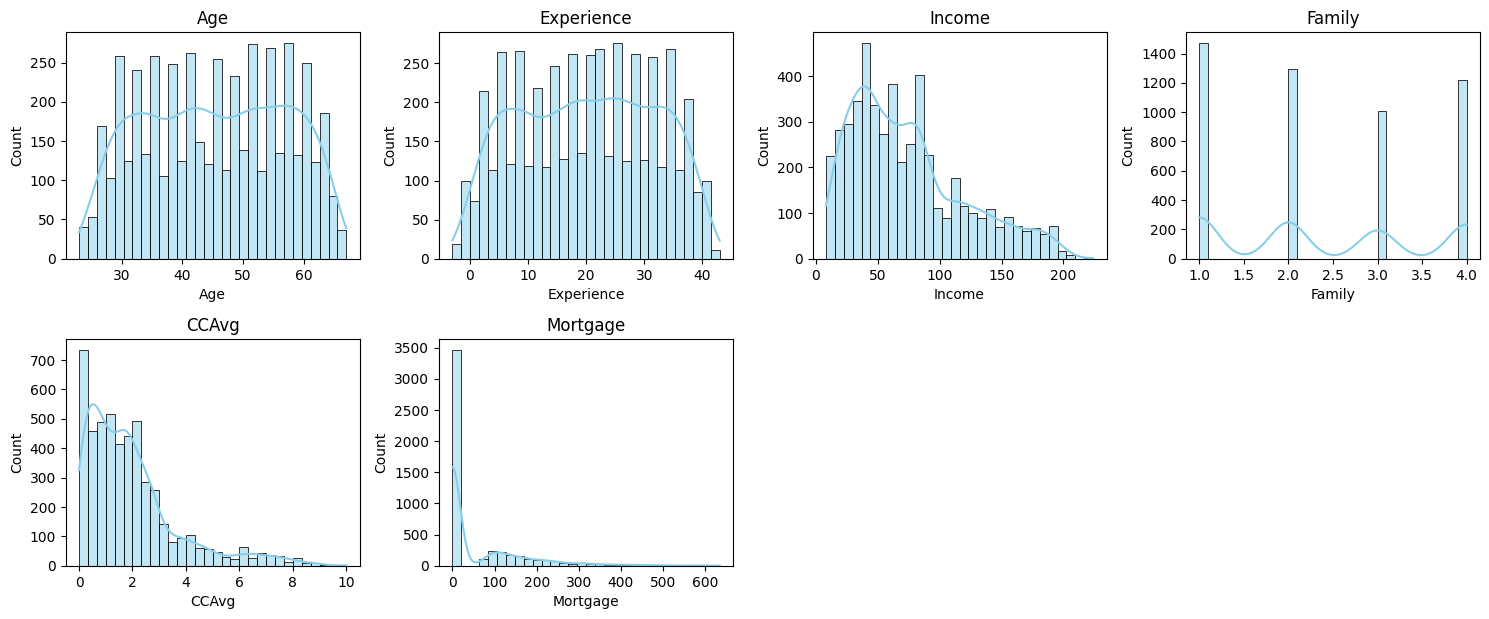

In [67]:
numeric_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Plot histograms
plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)  # adjust rows/columns as needed
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


Observations:
- CCAvg, Income and Mortgage distribution are right skewed
- Family size of the customers range from 1-4
- More than 400 customers have income of around $40
- Nearly most numbers of customers don't have mortgage

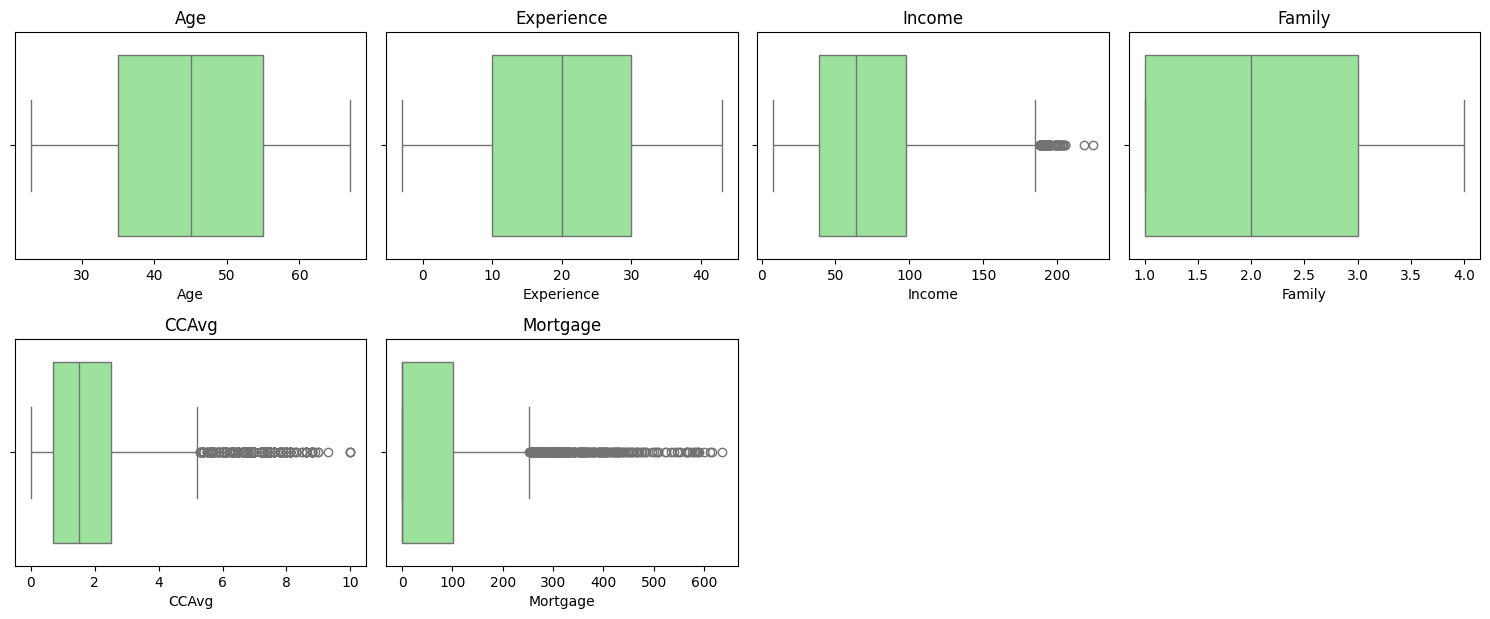

In [68]:
plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


Observations:
- Income, CCAvg and Mortgage have outliers
- Age, Experience and Family don't have any outliers
- Average experience of the customers is 20 years old
- Average age of the customers is 45 years old

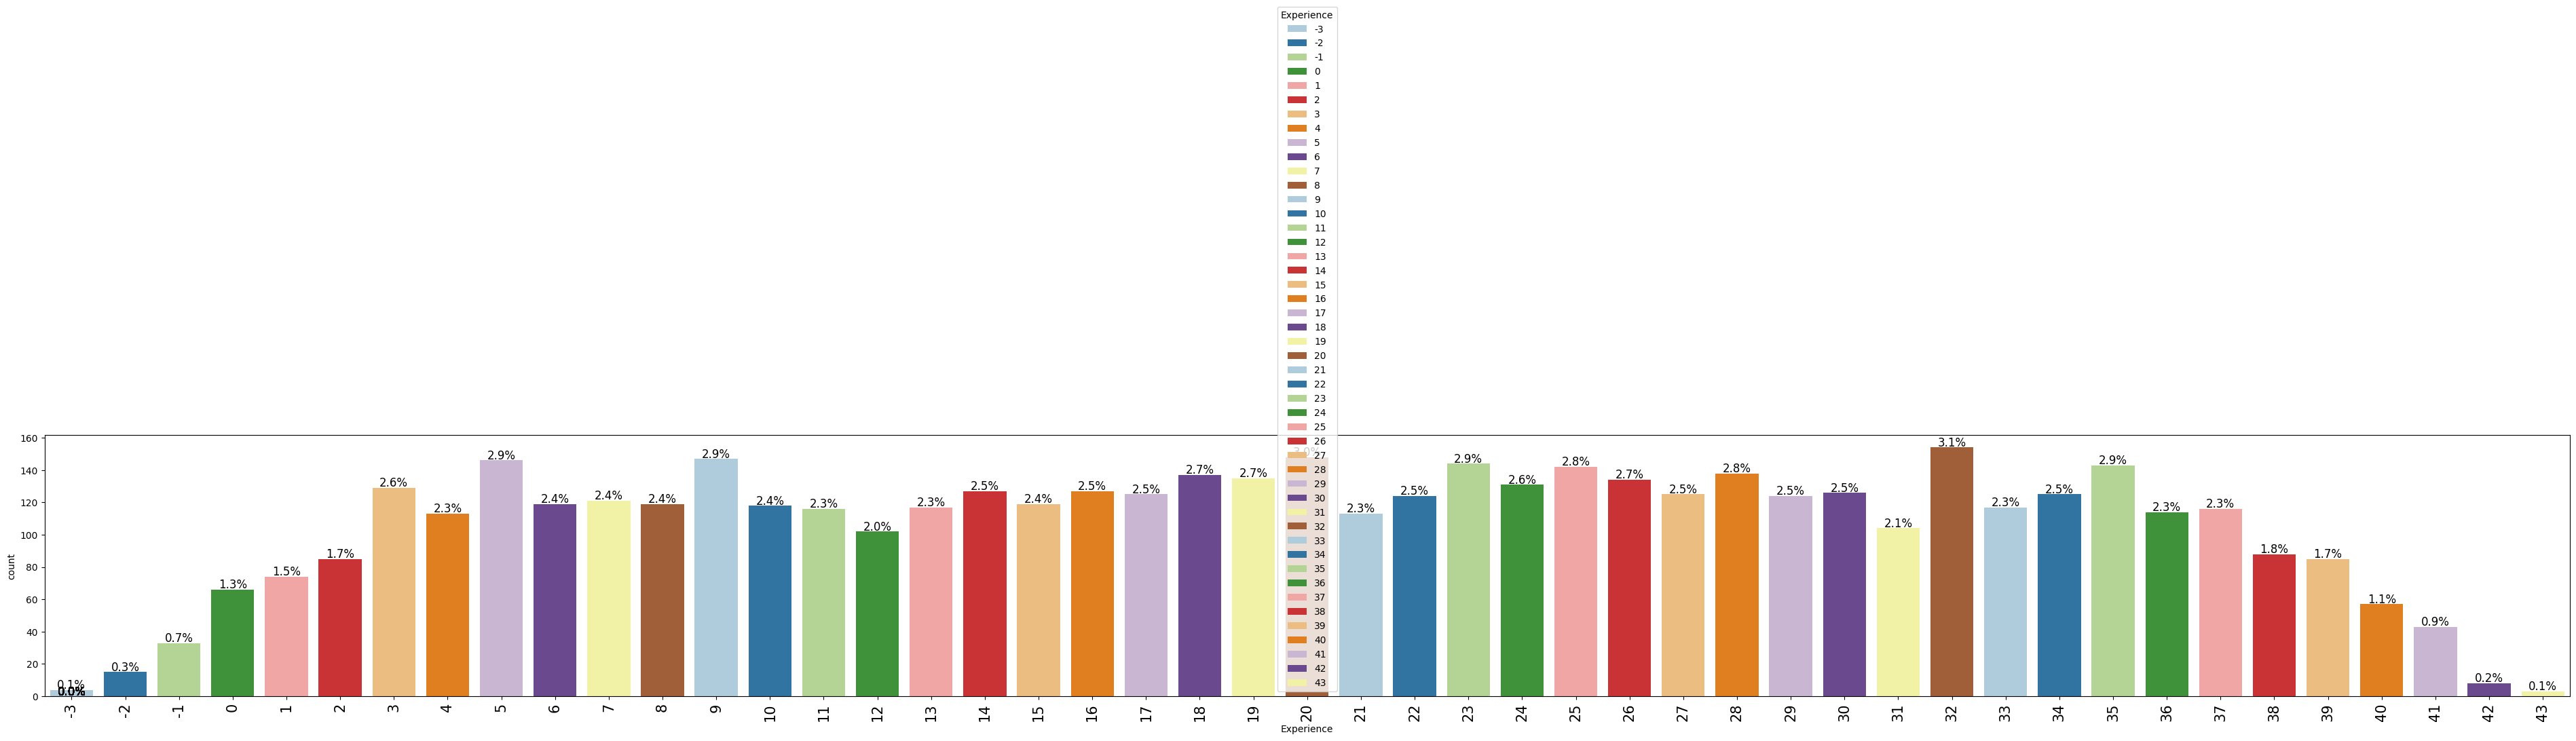

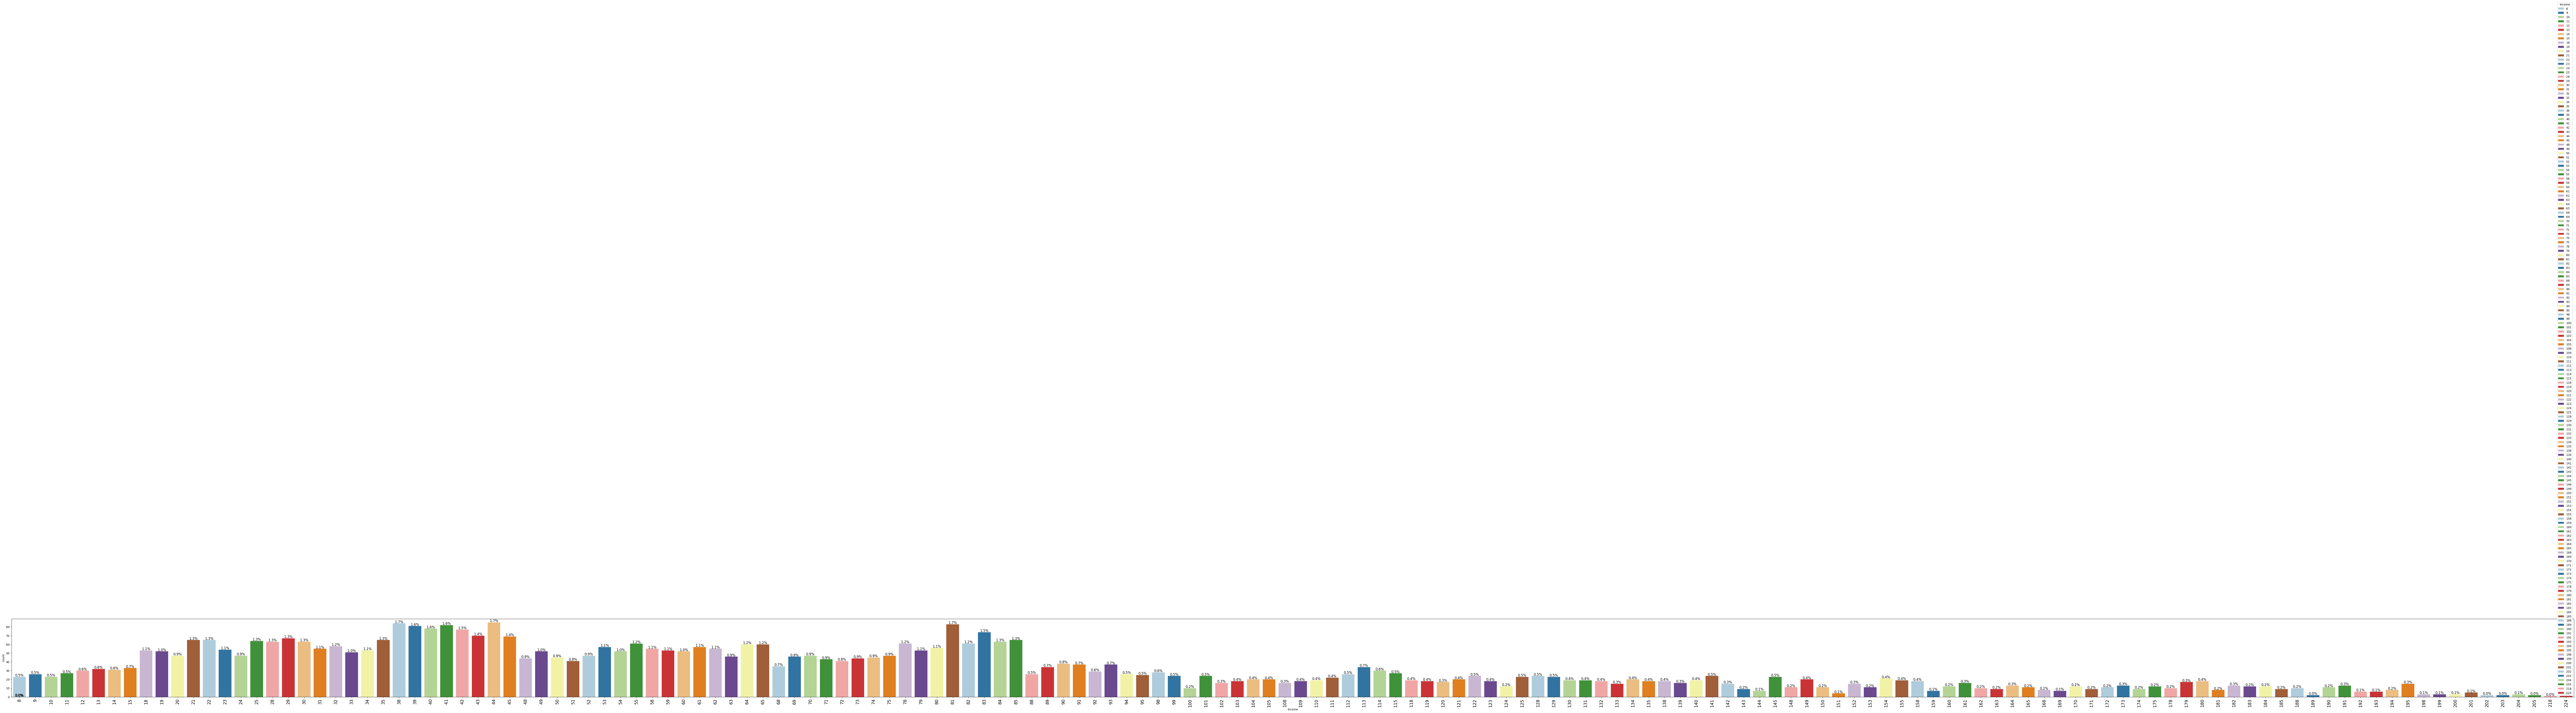

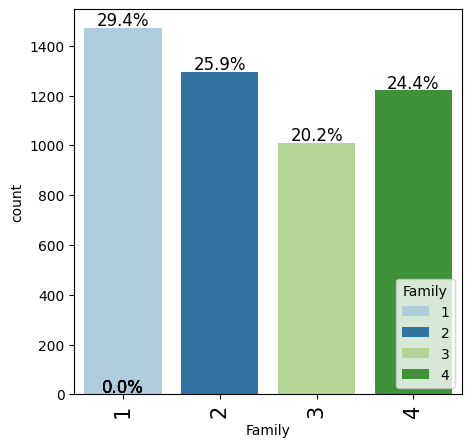

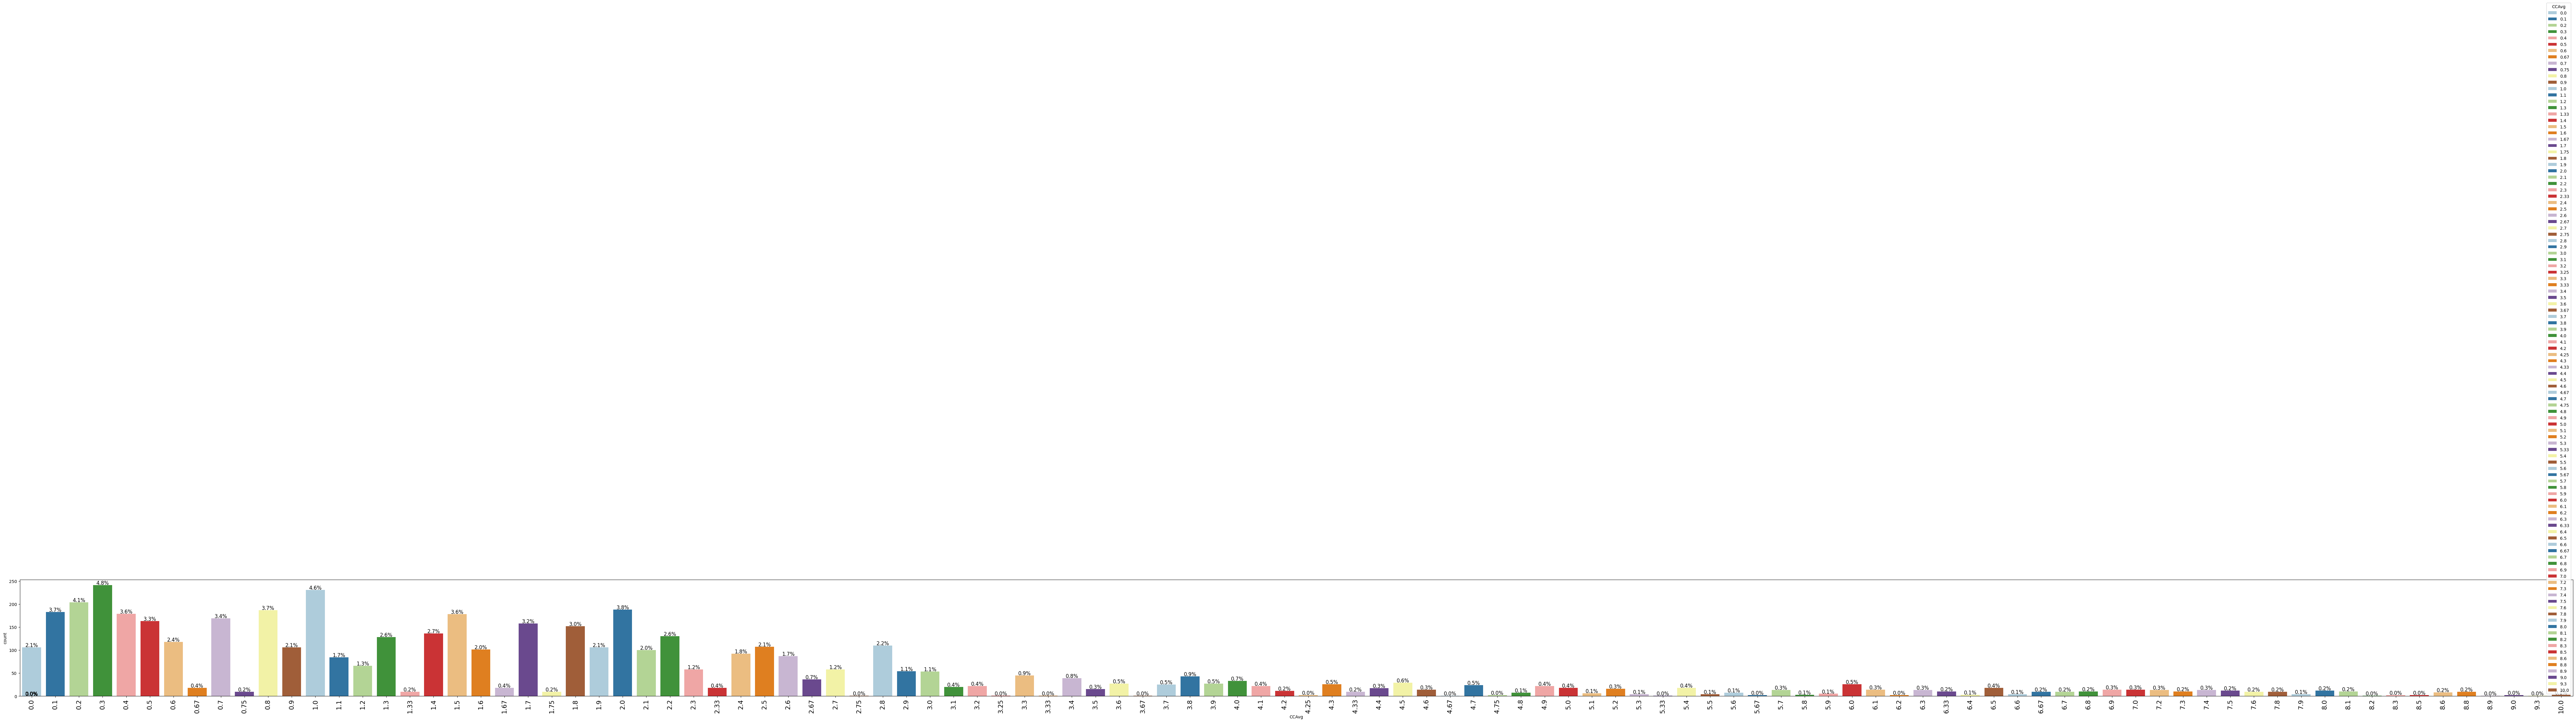

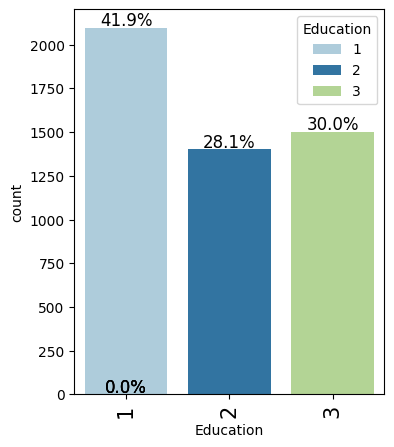

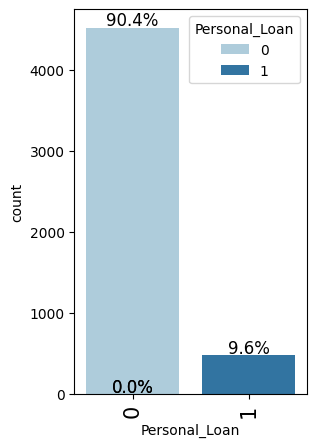

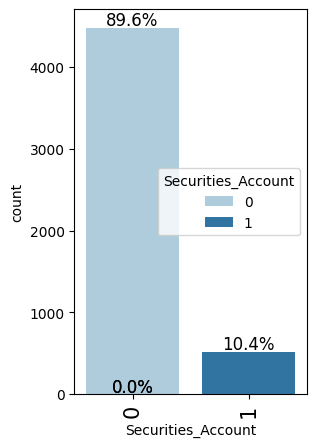

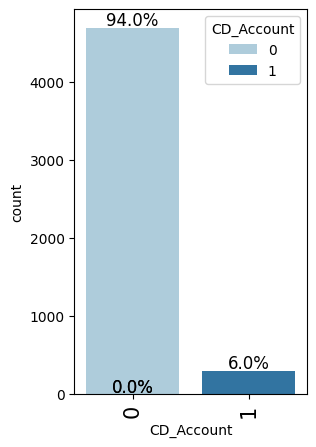

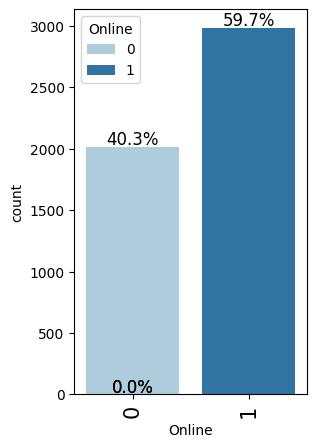

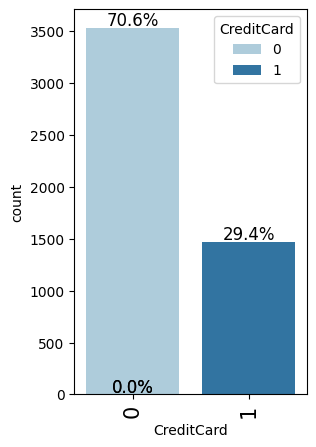

In [69]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

Observations:
- 70.6% customers don not have credit cards
- 59.7% customers use internet banking services
- 94% customers have a certificate of deposit (CD) account with the bank
- 89.6% customer have a securities account with the bank

### Bivariate Analysis

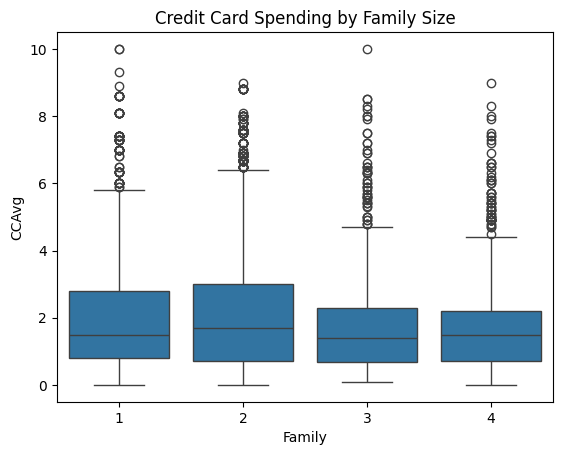

In [70]:
sns.boxplot(x='Family', y='CCAvg', data=df)
plt.title('Credit Card Spending by Family Size')
plt.show()

Observations:
- All family size from 1-4 vs Average spending on credit cards per month have outliers

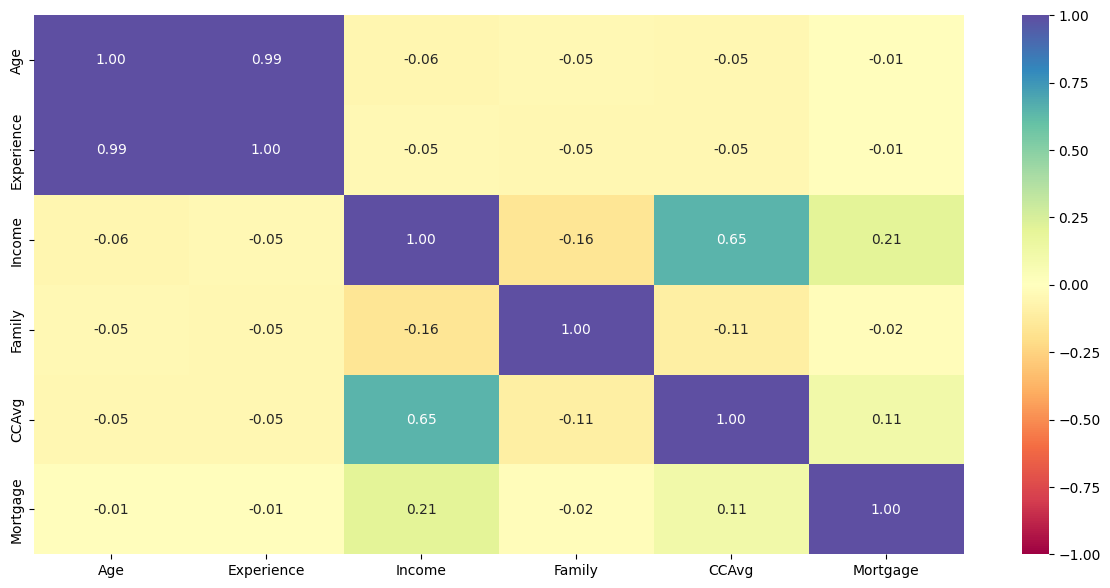

In [71]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
- Income has high positive correlation with CCAvg
- Age and Experience have nearly perfect correlation

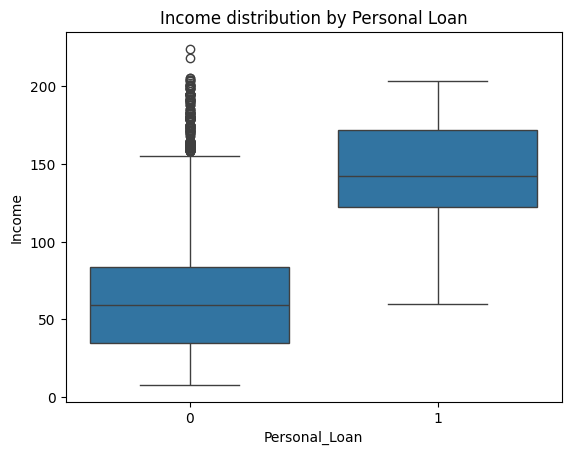

In [72]:
sns.boxplot(x='Personal_Loan', y='Income', data=df)
plt.title('Income distribution by Personal Loan')
plt.show()

Observations:
- Customers with income less than $150 and no personal loan have many outliers while customers with personal loan do not have any outliers

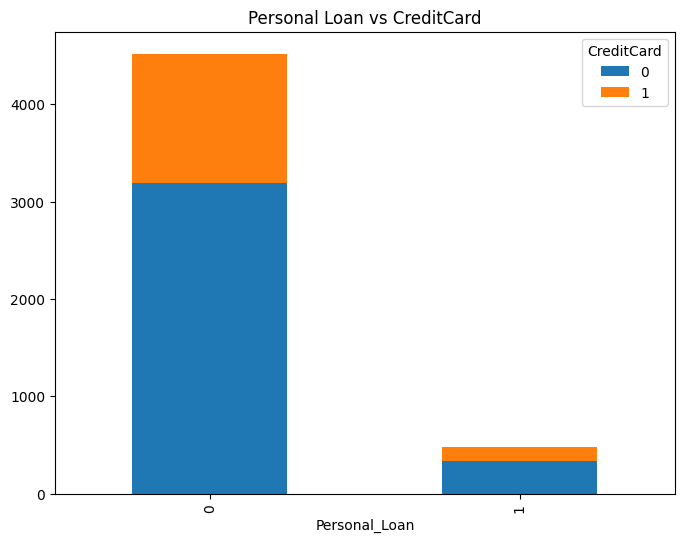

In [73]:
# Cross-tab
pd.crosstab(df['Personal_Loan'], df['CreditCard'])

# Stacked barplot
ct = pd.crosstab(df['Personal_Loan'], df['CreditCard'])
ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Personal Loan vs CreditCard')
plt.show()



Observations:
- High no of customers with no personal loan have credit cards

### Outlier Check

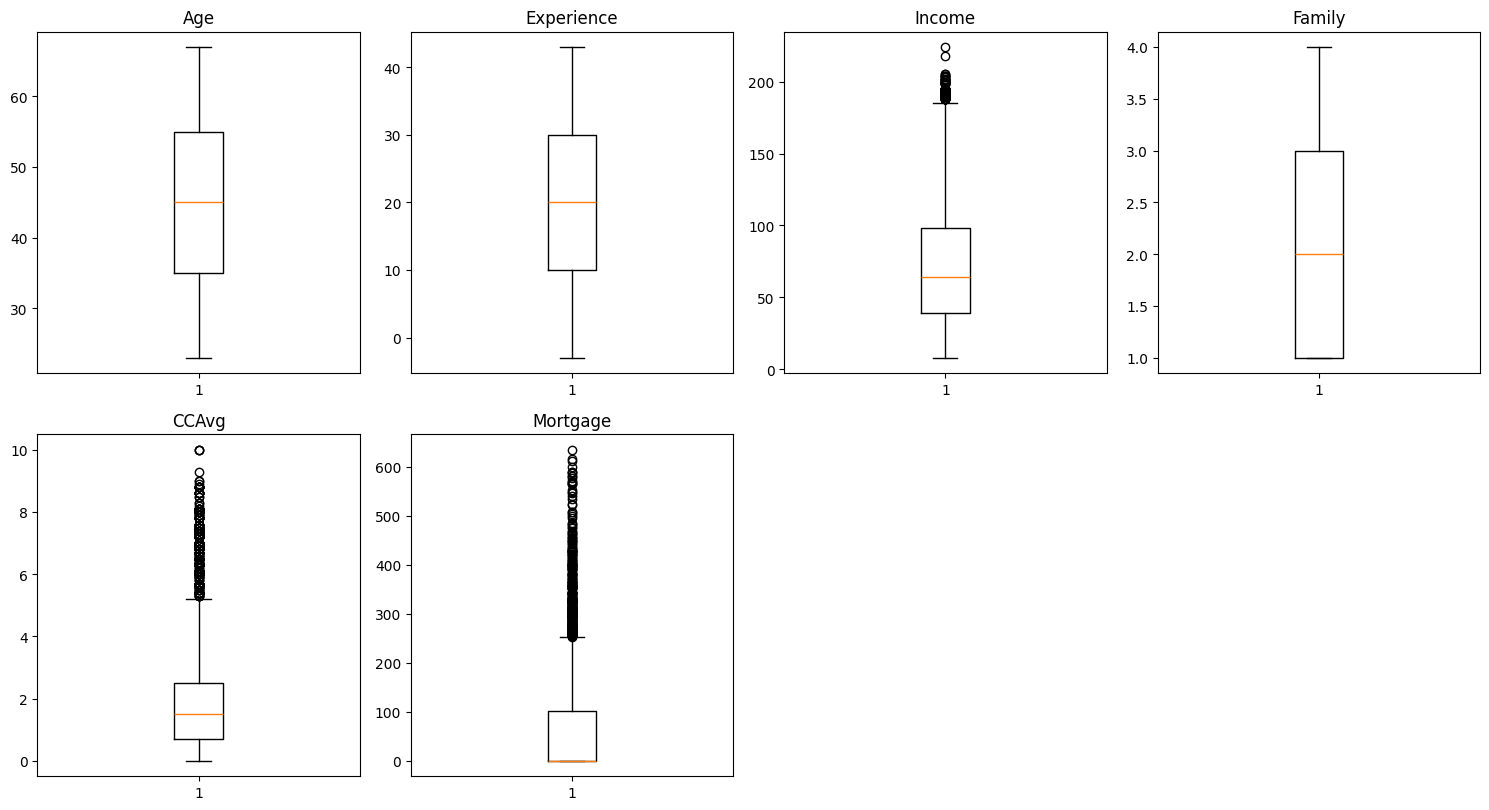

In [74]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are outliers in the columns *Income*, *CCAvg* and *Mortgage*.

### Data Preparation for Modeling

#### One hot encoding for categorical columns

In [75]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70], labels=['20-30','30-40','40-50','50-60','60-70'])


In [76]:
df = pd.get_dummies(df, columns=['Education','Age_Group'], drop_first=True)


In [78]:
X_numeric = ['Age','Experience','Income','Family','CCAvg','Mortgage']
scaler = StandardScaler()
df[X_numeric] = scaler.fit_transform(df[X_numeric])


#### Dropping the personal loan column

In [79]:
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']


#### Dividing the dataset into training and testing sets

In [80]:
# X = features, y = target (Personal_Loan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Checking the shape and percentage of classes in the training and testing set

In [81]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 16)
Shape of test set :  (1500, 16)
Percentage of classes in training set:
Personal_Loan
0    0.907714
1    0.092286
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895333
1    0.104667
Name: proportion, dtype: float64


Observations
* We had seen that around 90.7% of observations belongs to class 0 (Did not take a Loan) and 9.92% observations belongs to class 1 (Took a Loan), and this is preserved in the train and test sets

#### Defining some common methods for the decision trees

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [83]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [84]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [85]:
proba = model1.predict_proba(X_train)
print(proba)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


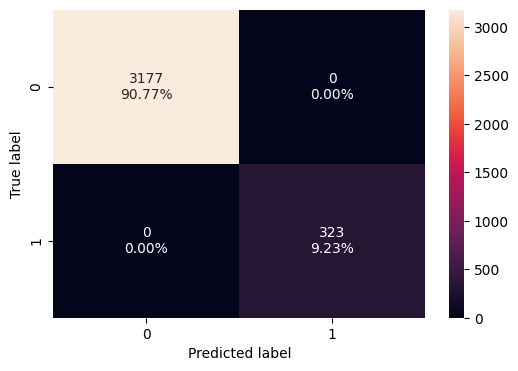

In [86]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [87]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Observations:
- For the default decision tree using the testing set, the accuracy and recall is perfect

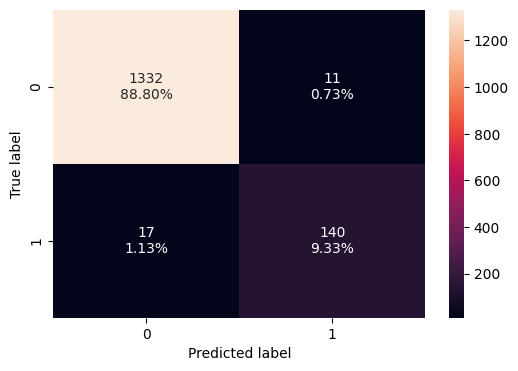

In [88]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [89]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_default_perf_test

Accuracy   Recall  Precision        F1
0  0.981333  0.89172   0.927152  0.909091

Observations:
- For the default decision tree using the testing set, the accuracy is 98.1% while recall is 90.4%
- Accuracy, recall and precision is lower for testing set compared to the training set

### Decision Tree (Pre-pruning)

In [90]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [91]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

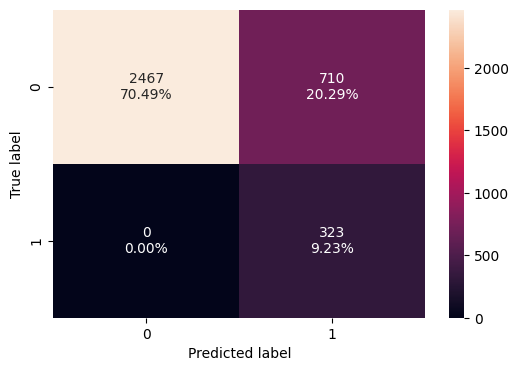

In [92]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [93]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision        F1
0  0.797143     1.0   0.312682  0.476401

Observations:
- For the pre-pruned decision tree using the training set, the accuracy is 79.7% while it has the perfect recall

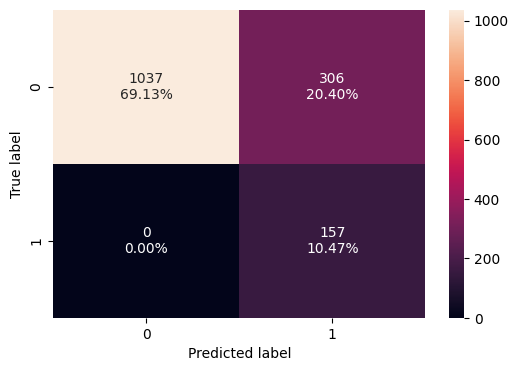

In [94]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [95]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision        F1
0     0.796     1.0   0.339093  0.506452

Observations:
- For the pre-pruned decision tree using the testing set, the accuracy is 79.7% while it has the perfect recall
- Both training and testing set have the same accuracy and recall while precision is higher for testing set

In [96]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

In [97]:
for name, score in zip(feature_names, importances):
    print(f"{name}: {score:.3f}")

Age: 0.000
Experience: 0.000
Income: 0.841
Family: 0.049
CCAvg: 0.110
Mortgage: 0.000
Securities_Account: 0.000
CD_Account: 0.000
Online: 0.000
CreditCard: 0.000
Education_2: 0.000
Education_3: 0.000
Age_Group_30-40: 0.000
Age_Group_40-50: 0.000
Age_Group_50-60: 0.000
Age_Group_60-70: 0.000


In [98]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_

# sort indices in descending order
indices = np.argsort(importances)[::-1]

for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.3f}")


Income: 0.841
CCAvg: 0.110
Family: 0.049
Age_Group_60-70: 0.000
Education_3: 0.000
Age_Group_50-60: 0.000
Age_Group_40-50: 0.000
Age_Group_30-40: 0.000
Online: 0.000
CreditCard: 0.000
Education_2: 0.000
CD_Account: 0.000
Mortgage: 0.000
Securities_Account: 0.000
Experience: 0.000
Age: 0.000


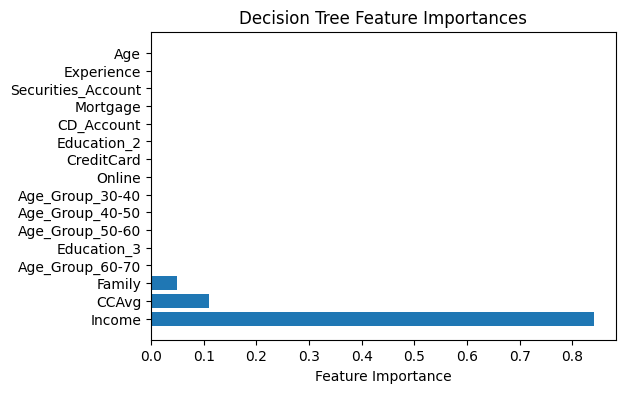

In [99]:
plt.figure(figsize=(6,4))
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.show()


* In the pre-pruned decision tree, Income is the most important features.
* The other two important features are CCAvg and Family

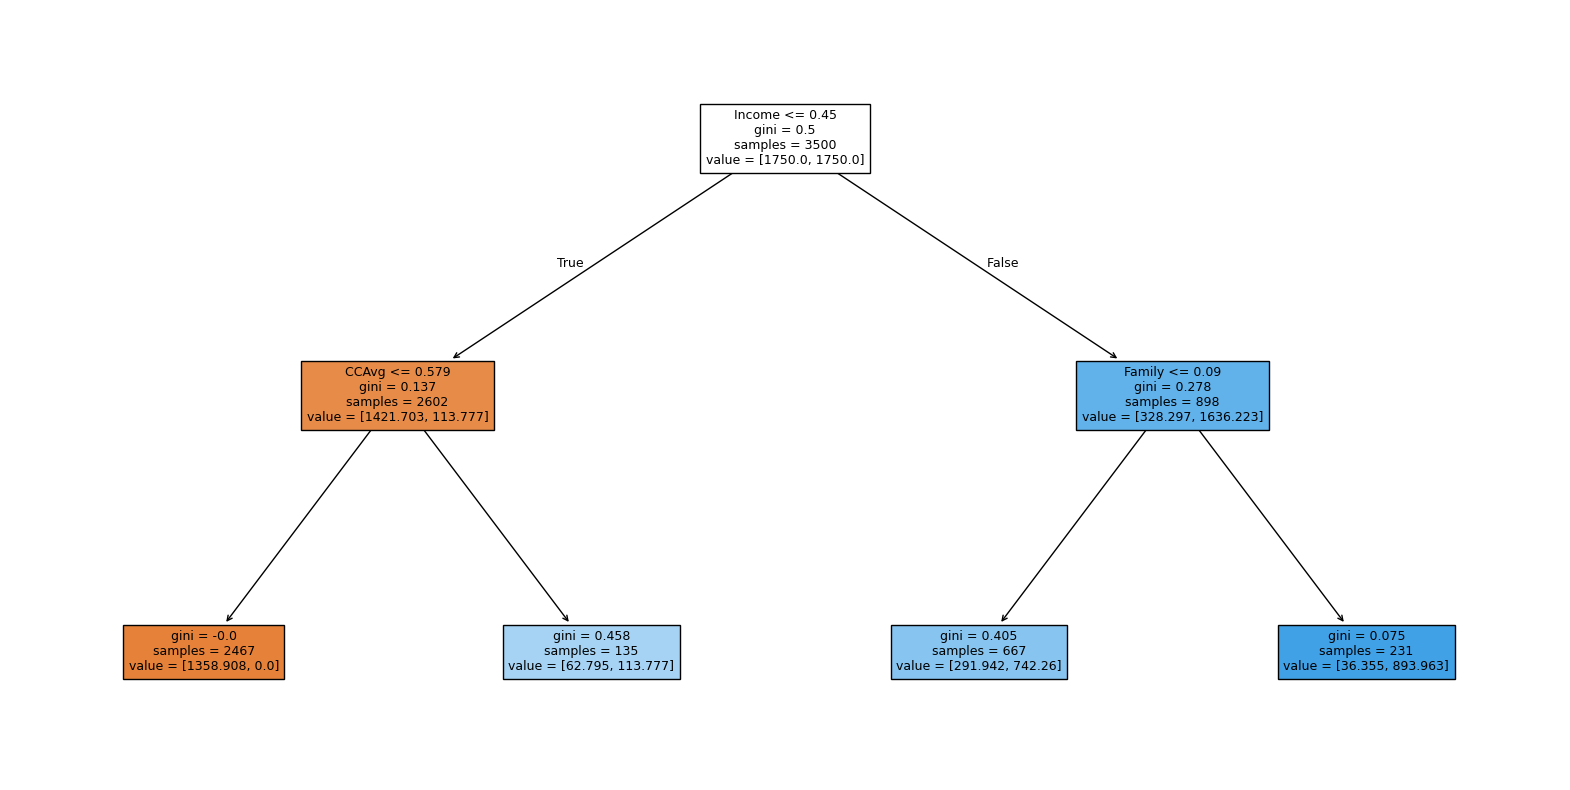

In [100]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Decision Tree (Post pruning)

In [101]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

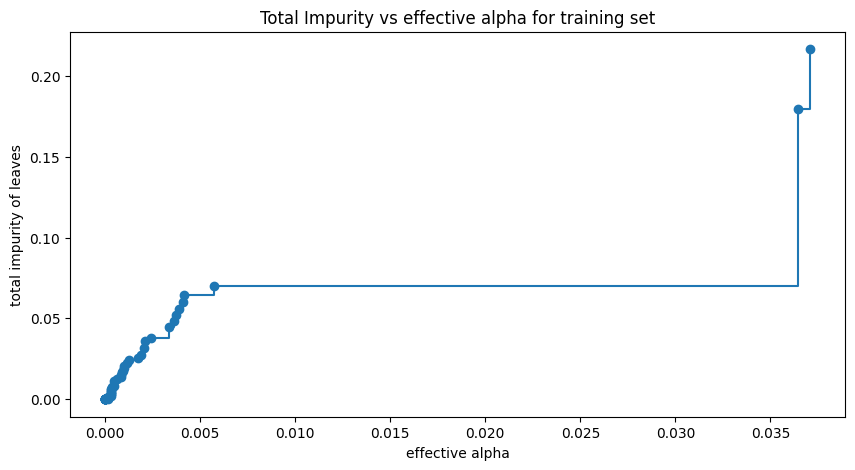

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [103]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2835538739883297


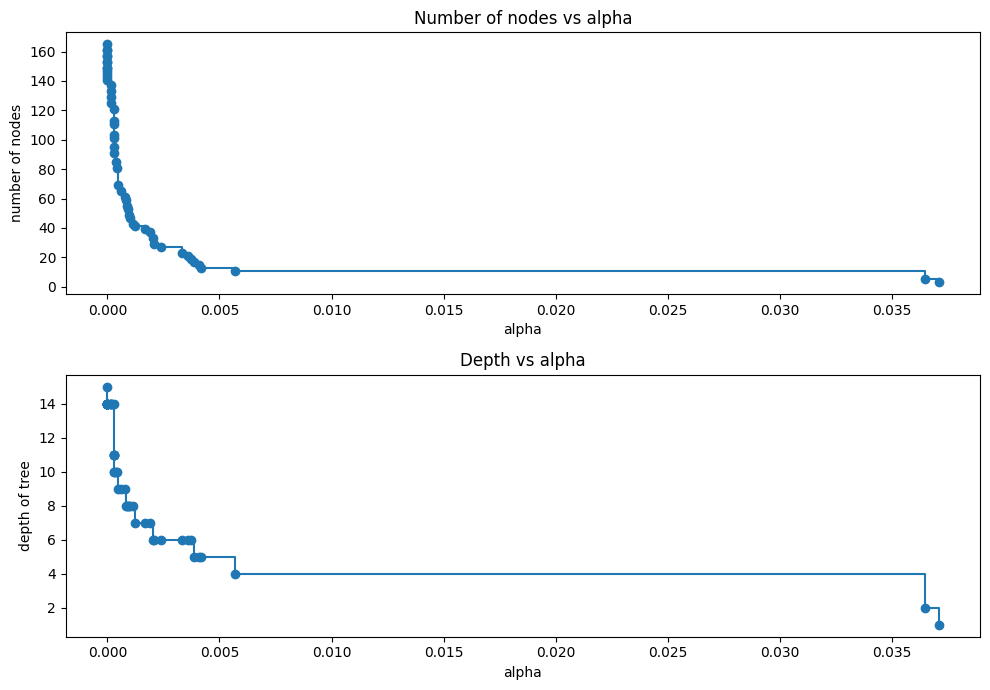

In [104]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [105]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [106]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [107]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

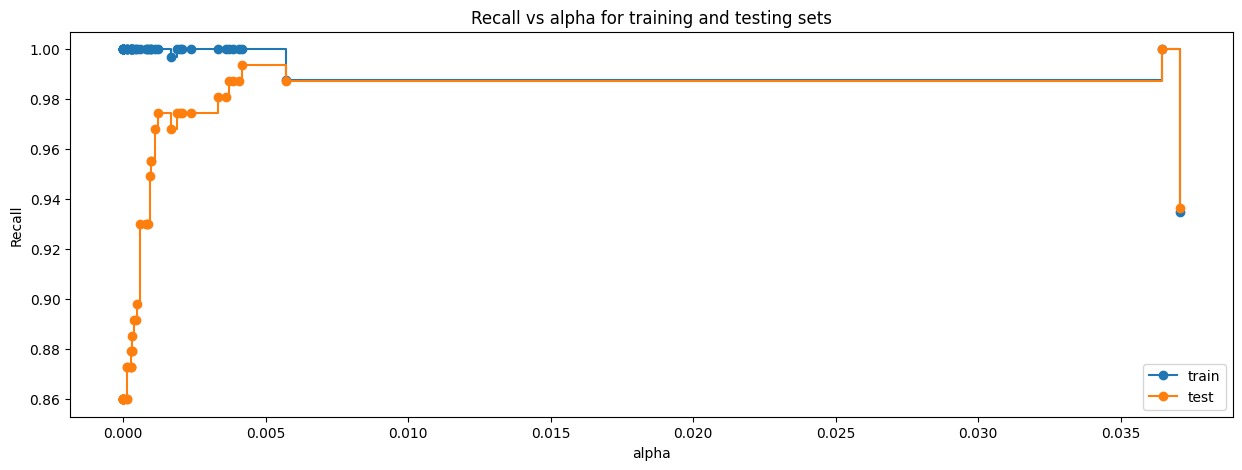

In [108]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [109]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.03646539828130177),
                       class_weight='balanced', random_state=1)


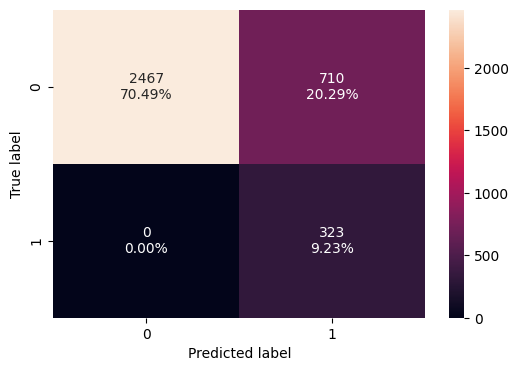

In [110]:
model3 = best_model
confusion_matrix_sklearn(model3, X_train, y_train)

In [111]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision        F1
0  0.797143     1.0   0.312682  0.476401

Observations:
- For the post-pruned decision tree using the training set, the accuracy is 79.7% while it has the perfect recall


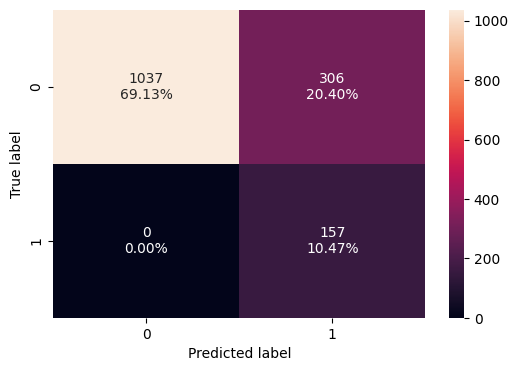

In [112]:
confusion_matrix_sklearn(model3, X_test, y_test)

In [113]:
decision_tree_post_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision        F1
0     0.796     1.0   0.339093  0.506452

Observations:
- For the post-pruned decision tree using the testing set, the accuracy is 79.7% while it has the perfect recall
- Both training and testing set have the same accuracy and recall

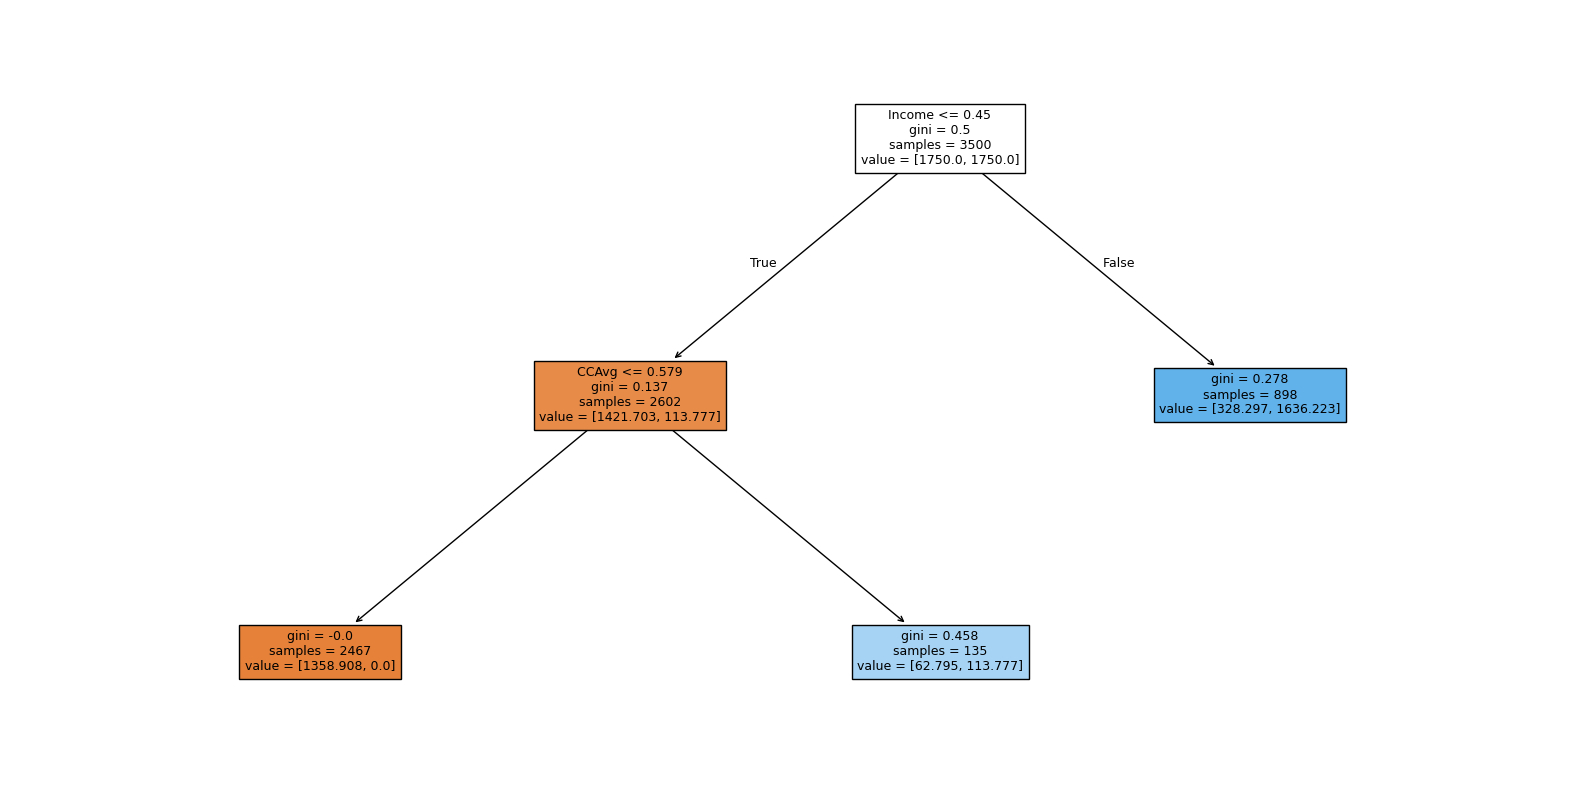

In [114]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [115]:
importances = model3.feature_importances_
indices = np.argsort(importances)

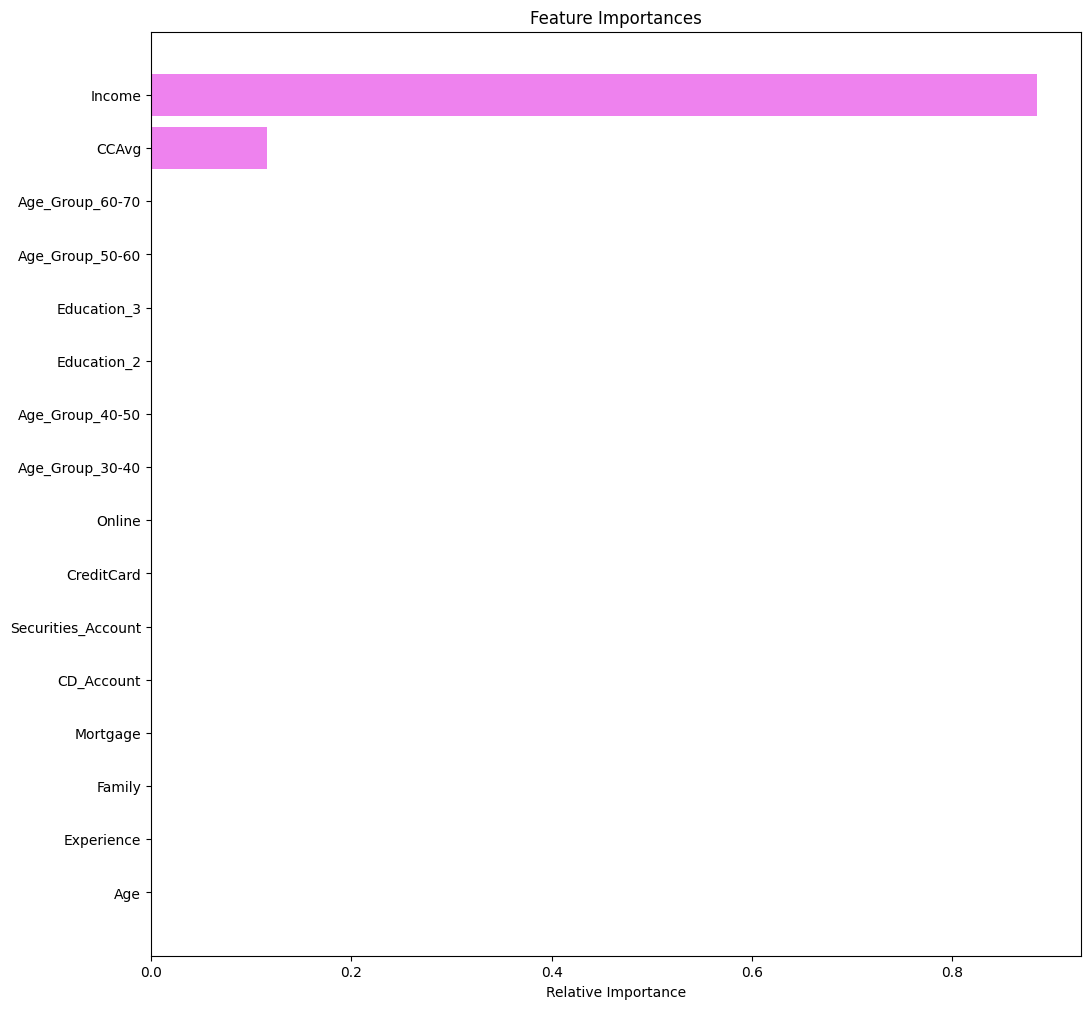

In [116]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the post-pruned decision tree, Income and CCAvg is the most important features.

## Comparison of Models and Final Model Selection

In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.797143   
Recall                                 1.0                     1.000000   
Precision                              1.0                     0.312682   
F1                                     1.0                     0.476401   

           Decision Tree (Post-Pruning)  
Accuracy                       0.797143  
Recall                         1.000000  
Precision                      0.312682  
F1                             0.476401

* All 3 decision trees ie default, pre-pruned and post-pruned trees for the training set have perfect recall scores of 1
* The default decision tree has the perfect accuracy, precision and F1 score

In [118]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.981333                     0.796000   
Recall                            0.891720                     1.000000   
Precision                         0.927152                     0.339093   
F1                                0.909091                     0.506452   

           Decision Tree (Post-Pruning)  
Accuracy                       0.796000  
Recall                         1.000000  
Precision                      0.339093  
F1                             0.506452

Observations:
* Both pre-pruned and post-pruned trees for the testing set have perfect recall scores of 1
* The default decision tree has the highest accuracy, precision and F1 score
* The default Decision Tree has the highest accuracy and balanced performance, but it might be overfitting
* Both Pre-Pruning and Post-Pruning reduce overfitting, but at the cost of precision and overall accuracy

## Conclusions and Recommendations

Conclusions:
- The unpruned Decision Tree performed best in accuracy and F1-score but is likely overfitting.
- The pruned trees were simpler and achieved perfect recall, meaning they identified all potential loan takers but also gave many false positives.
- Pruning improved generalization but reduced precision and overall accuracy.

Recommendations:
- A large portion of credit card users do not have personal loans, showing a great cross-selling opportunity — the bank can reach out to these loyal, financially active customers with tailored loan offers.
- Focus marketing efforts on customer segments with higher income, greater average credit card spending (CCAvg) as these are the most important features.
- Undergraduate customers form the largest group and are at an early life stage; they can be approached with education or personal loan offers.

